In [49]:
import numpy as np
import dython as dt
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('datasets/aerolineas/train.csv')
df.drop(columns=[df.columns[0]], inplace=True) # Eliminar columna tipo índice
df.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 103904 non-null  int64  
 1   Gender                             103904 non-null  object 
 2   Customer Type                      103904 non-null  object 
 3   Age                                103904 non-null  int64  
 4   Type of Travel                     103904 non-null  object 
 5   Class                              103904 non-null  object 
 6   Flight Distance                    103904 non-null  int64  
 7   Inflight wifi service              103904 non-null  int64  
 8   Departure/Arrival time convenient  103904 non-null  int64  
 9   Ease of Online booking             103904 non-null  int64  
 10  Gate location                      103904 non-null  int64  
 11  Food and drink                     1039

### Manejo de nulos y faltantes

In [9]:
# Cantidad de valores nulos para "Arrival Delay in Minutes"
df['Arrival Delay in Minutes'].isnull().sum().item()

310

In [10]:
# Total de observaciones sin valores nulos
df['Arrival Delay in Minutes'].size - df['Arrival Delay in Minutes'].isnull().sum().item()

103594

In [11]:
# Porcentaje de nulos
print(f"{(df['Arrival Delay in Minutes'].isnull().sum().item() * 100) / df['Arrival Delay in Minutes'].size:.2f}%") 

0.30%


In [12]:
# Distribución de valores.
###### <warning>
# Display grande!
###### </warning>
# con pd.option_context('display.max_rows', None, 'display.max_columns', None):
#    display(df[df['Arrival Delay in Minutes'].isnull()])

In [13]:
# No se observan patrones obvios
###### <warning>
# Imagen grande
###### </warning>
#plt.figure(figsize=(16, 108))
#sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
#plt.title('Missing Value Pattern')
#plt.show()

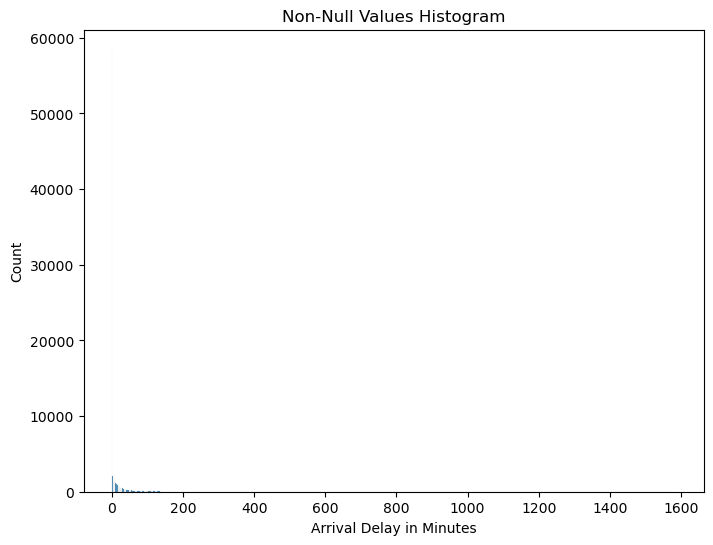

In [14]:
# ¿Qué debemos hacer con estos valores nulos?
# AD dice que si los MCAR representan < 5 a 10% de los datos, podemos eliminarlos directamente.
# También dice que si los MCAR están entre ~10 y 30%, podemos recurrir a la imputación.
# Dado que en este caso tenemos ~0,3% de datos faltantes, podríamos eliminarlos, pero verifiquemos la distribución no nula, tal vez 
# podamos hacer una imputación.

#df[df['Arrival Delay in Minutes'].notnull()]['Arrival Delay in Minutes']
plt.figure(figsize=(8, 6))
sns.histplot(data=df[df['Arrival Delay in Minutes'].notnull()], x='Arrival Delay in Minutes')
plt.title('Non-Null Values Histogram')
plt.show()

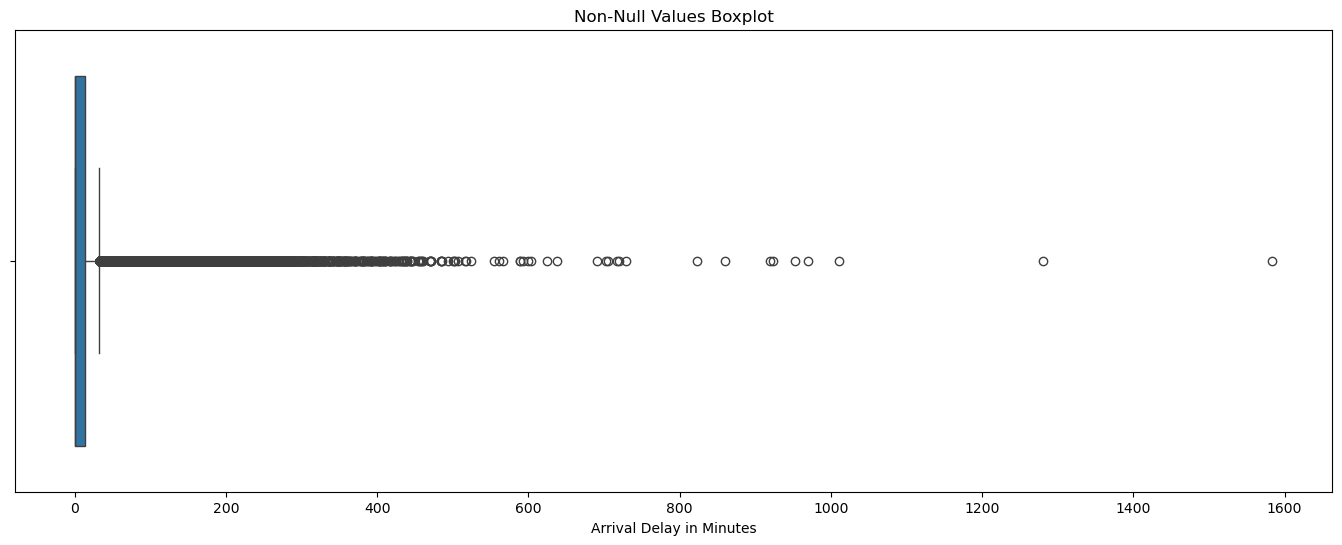

In [15]:
plt.figure(figsize=(17, 6))
sns.boxplot(data=df[df['Arrival Delay in Minutes'].notnull()], x='Arrival Delay in Minutes')
plt.title('Non-Null Values Boxplot')
plt.show()

In [16]:
# Dado que estos no se distribuyen normalmente, la imputación por la media no está justificada.
# Podríamos hacer una imputación por la mediana, pero para justificarla adecuadamente se requiere un análisis más profundo.
df[df['Arrival Delay in Minutes'].notnull()]['Arrival Delay in Minutes'].median().item()

0.0

In [17]:
# La mediana es 0, lo que parece un poco extremo.
# Recurrimos a la eliminación.

In [18]:
df = df[df['Arrival Delay in Minutes'].notnull()]

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 103594 entries, 0 to 103903
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 103594 non-null  int64  
 1   Gender                             103594 non-null  object 
 2   Customer Type                      103594 non-null  object 
 3   Age                                103594 non-null  int64  
 4   Type of Travel                     103594 non-null  object 
 5   Class                              103594 non-null  object 
 6   Flight Distance                    103594 non-null  int64  
 7   Inflight wifi service              103594 non-null  int64  
 8   Departure/Arrival time convenient  103594 non-null  int64  
 9   Ease of Online booking             103594 non-null  int64  
 10  Gate location                      103594 non-null  int64  
 11  Food and drink                     103594 no

### Target a numérica

In [20]:
df['satisfaction'].unique()

array(['neutral or dissatisfied', 'satisfied'], dtype=object)

In [21]:
# Dado que probaremos diferentes modelos más adelante, sería útil agregar
# una columna de target numérico. La llamaremos "satisfaction_num".
satisfaction_map = {s_lvl: s_int for s_int, s_lvl in enumerate(df['satisfaction'].unique())}
satisfaction_map

{'neutral or dissatisfied': 0, 'satisfied': 1}

In [22]:
# Agregamos una nueva columna
df['satisfacion_num'] = df['satisfaction'].map(satisfaction_map)

In [23]:
df.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,satisfacion_num
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,4,3,4,4,5,5,25,18.0,neutral or dissatisfied,0
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,5,3,1,4,1,1,6.0,neutral or dissatisfied,0
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,4,3,4,4,4,5,0,0.0,satisfied,1
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,5,3,1,4,2,11,9.0,neutral or dissatisfied,0
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,4,4,3,3,3,0,0.0,satisfied,1


### EDA 

#### Balance de clases

satisfaction
neutral or dissatisfied    56.660617
satisfied                  43.339383
Name: proportion, dtype: float64


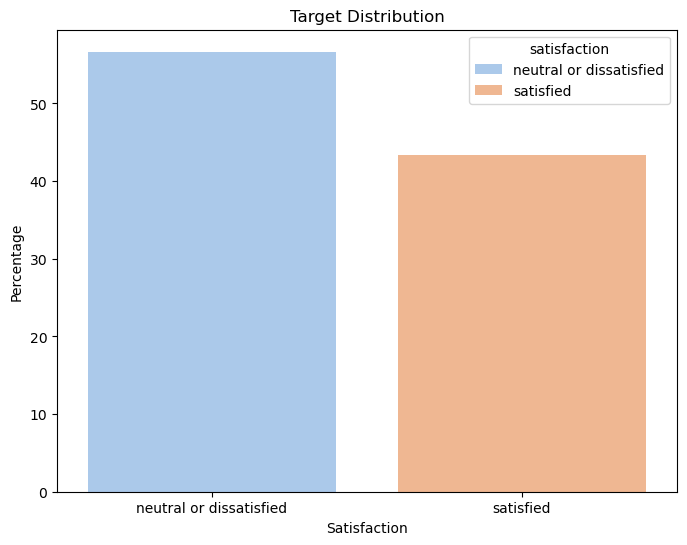

In [26]:
# Valores
print(df['satisfaction'].value_counts(normalize=True) * 100)
# Plot
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='satisfaction', hue='satisfaction', stat='percent', palette='pastel', legend=True)
plt.title('Target Distribution')
plt.xlabel('Satisfaction')
plt.ylabel('Percentage')
plt.show()

In [29]:
# Los datos parecen razonablemente balanceados

#### Por género

satisfaction  neutral or dissatisfied  satisfied
Gender                                          
Female                      29.062494  21.689480
Male                        27.598123  21.649903


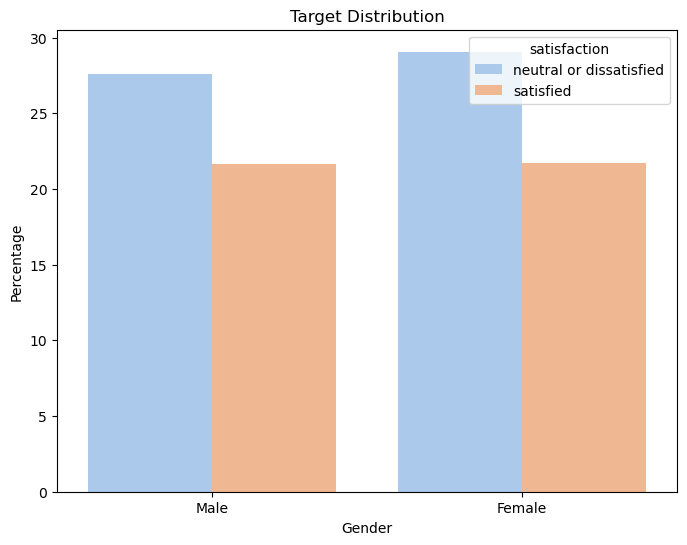

In [28]:
# Valores
print(pd.crosstab(df['Gender'], df['satisfaction'], normalize='all') * 100)
# Plot
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Gender', hue='satisfaction', stat='percent', palette='pastel', legend=True)
plt.title('Target Distribution')
plt.xlabel('Gender')
plt.ylabel('Percentage')
plt.show()

In [30]:
# Los datos también parecen razonablemente balanceados. 
# Para cada categoría, observamos que el número de clientes satisfechos es significativamente menor que el de la alternativa.

#### Por tipo de cliente

satisfaction       neutral or dissatisfied  satisfied
Customer Type                                        
Loyal Customer                   42.713864  39.010947
disloyal Customer                13.946754   4.328436


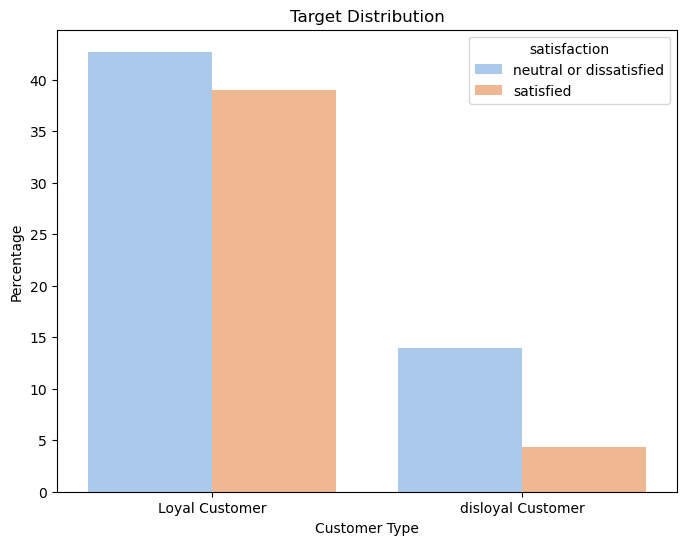

In [31]:
# Valores
print(pd.crosstab(df['Customer Type'], df['satisfaction'], normalize='all') * 100)
# Plot
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Customer Type', hue='satisfaction', stat='percent', palette='pastel', legend=True)
plt.title('Target Distribution')
plt.xlabel('Customer Type')
plt.ylabel('Percentage')
plt.show()

In [32]:
# Aquí tenemos un pequeño desbalance.
# En primer lugar, parece que es más probable que los clientes leales hayan completado la encuesta de satisfacción.
# Estos clientes parecen estar bastante balanceados en términos de satisfacción.
# Por otro lado, los clientes desleales, que suponen alrededor del 20% de los datos, 
# parecen favorecer fuertemente niveles de satisfacción neutrales o insatisfechos.

#### Por tipo de viaje

satisfaction     neutral or dissatisfied  satisfied
Type of Travel                                     
Business travel                28.796069  40.189586
Personal Travel                27.864548   3.149796


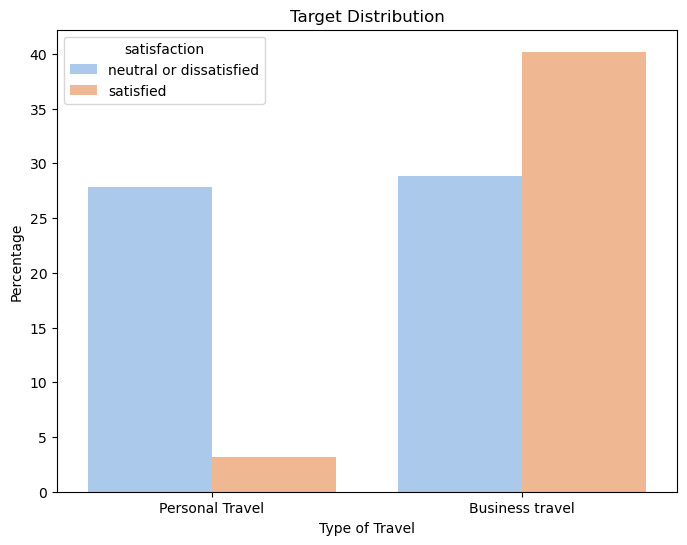

In [33]:
# Valores
print(pd.crosstab(df['Type of Travel'], df['satisfaction'], normalize='all') * 100)
# Plot
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Type of Travel', hue='satisfaction', stat='percent', palette='pastel', legend=True)
plt.title('Target Distribution')
plt.xlabel('Type of Travel')
plt.ylabel('Percentage')
plt.show()

In [26]:
# Aquí también tenemos un pequeño desbalance.
# En primer lugar, parece que las personas que viajan por negocios 
# tienen más probabilidades de completar la encuesta de satisfacción.
# Estos clientes parecen estar satisfechos, pero no por un margen grande.
# Por otro lado, quienes viajan por motivos personales, que representan alrededor del 30% de los datos, 
# parecen preferir fuertemente los niveles de satisfacción neutrales o insatisfechos, por un amplio margen.

#### Por clase

satisfaction  neutral or dissatisfied  satisfied
Class                                           
Business                    14.617642  33.196903
Eco                         36.606367   8.370176
Eco Plus                     5.436608   1.772303


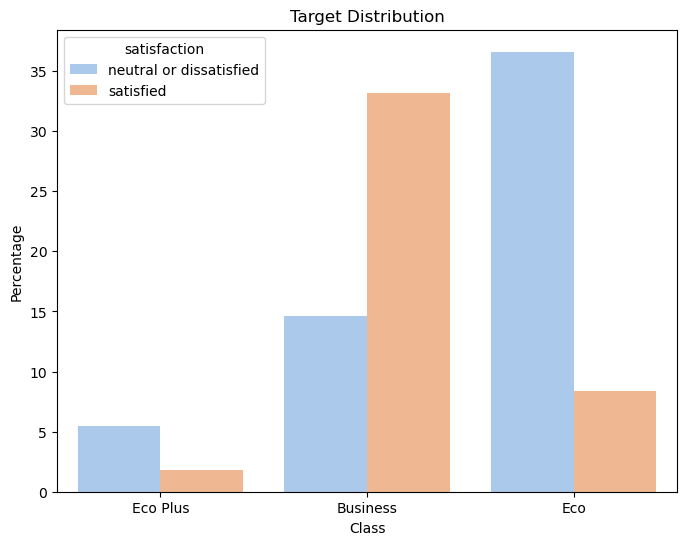

In [34]:
# Valores
print(pd.crosstab(df['Class'], df['satisfaction'], normalize='all') * 100)
# Plot
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Class', hue='satisfaction', stat='percent', palette='pastel', legend=True)
plt.title('Target Distribution')
plt.xlabel('Class')
plt.ylabel('Percentage')
plt.show()

In [28]:
# Aquí también tenemos un pequeño desbalance.
# En primer lugar, aquellos que viajan en Eco Plus parecen tener muchas menos probabilidades de completar la encuesta que los de otras clases.
# Estos clientes no parecen estar satisfechos, pero no por un margen amplio.
# En cuanto a los demás, los del sector empresarial parecen estar satisfechos y los del sector ecológico parecen estar insatisfechos.

#### Por edad

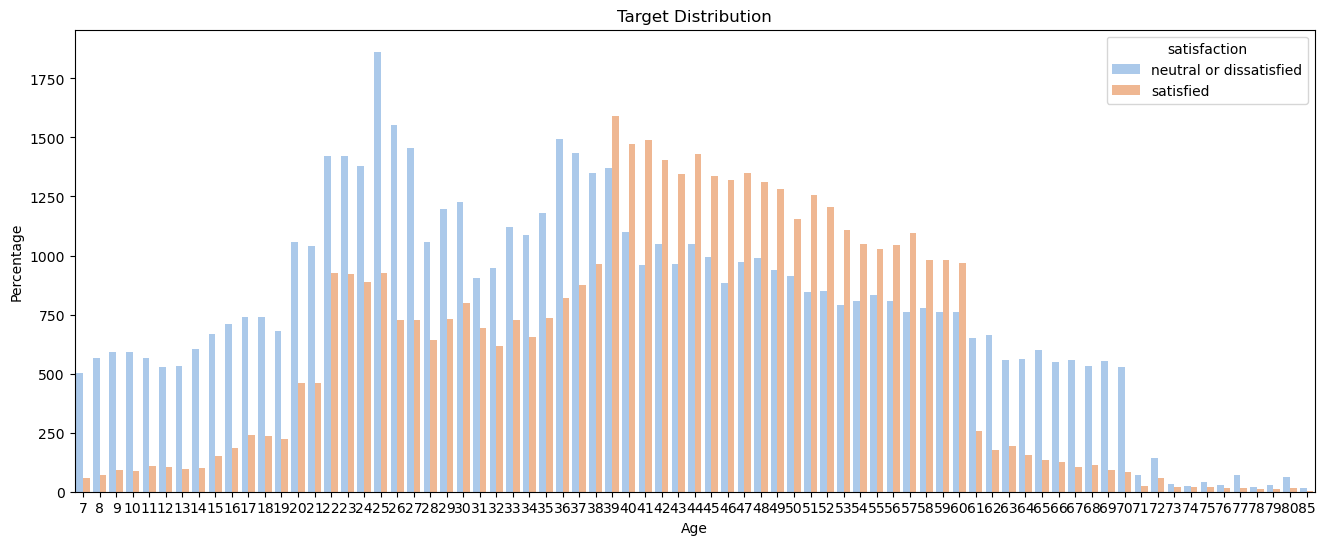

In [35]:
# Plot
plt.figure(figsize=(16, 6))
sns.countplot(data=df, x='Age', hue='satisfaction', stat='count', palette='pastel', legend=True)
plt.title('Target Distribution')
plt.xlabel('Age')
plt.ylabel('Percentage')
plt.show()

In [30]:
# Parece que las personas de 38 años o menos tienen más probabilidades de no estar satisfechas, al igual que las personas de 61 años o más.
# En el medio, hay un rango de edades en las que las personas tienen más probabilidades de estar satisfechas.

#### Por distancia de vuelo

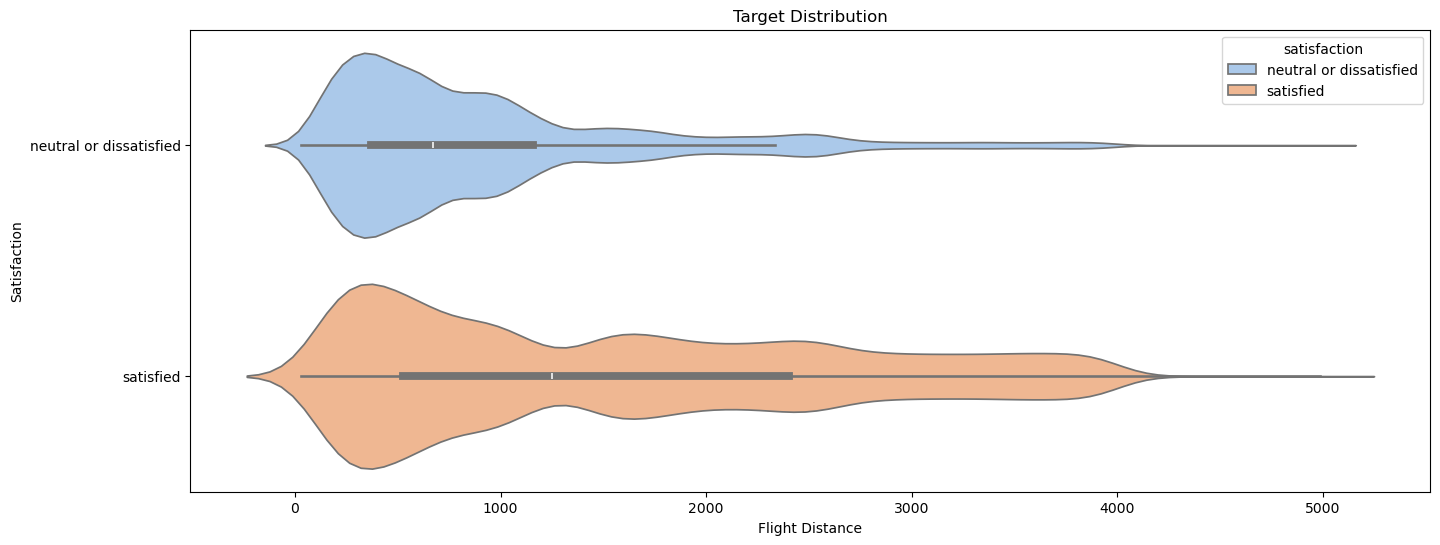

In [36]:
# Plot
plt.figure(figsize=(16, 6))
sns.violinplot(data=df, x='Flight Distance', y='satisfaction', hue='satisfaction', palette='pastel', legend=True)
plt.title('Target Distribution')
plt.xlabel('Flight Distance')
plt.ylabel('Satisfaction')
plt.show()

In [37]:
# Parece que las personas que realizan vuelos más largos tienen más probabilidades de estar satisfechas.

#### Por retraso de salida

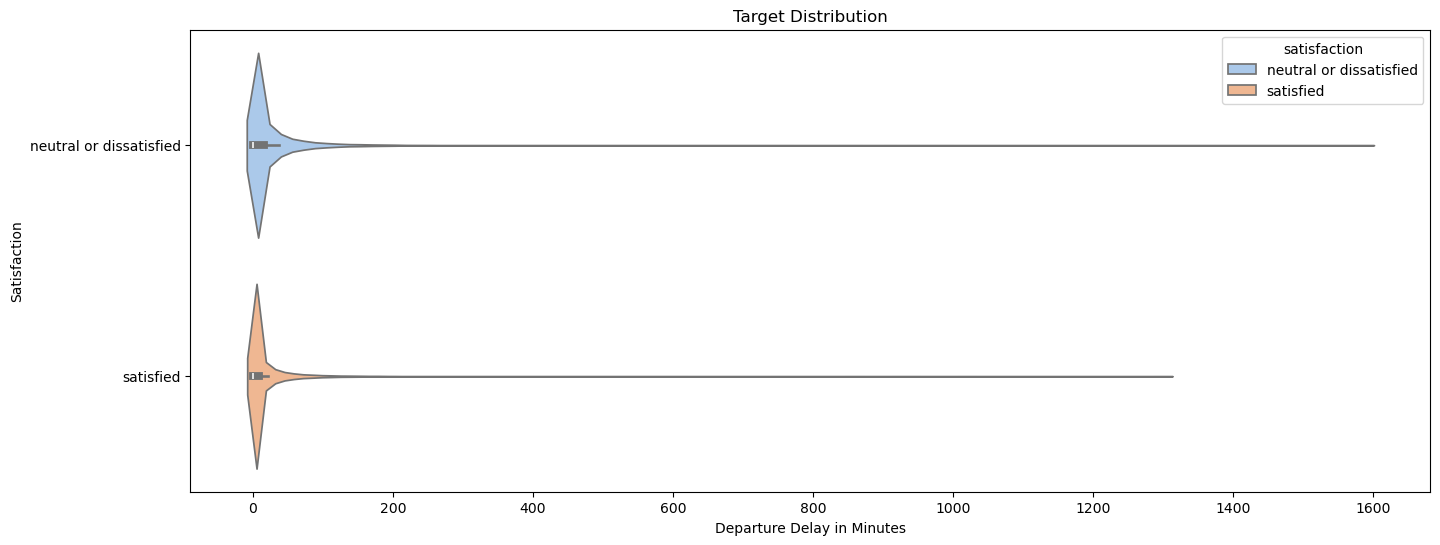

In [38]:
# Plot
plt.figure(figsize=(16, 6))
sns.violinplot(data=df, x='Departure Delay in Minutes', y='satisfaction', hue='satisfaction', palette='pastel', legend=True)
plt.title('Target Distribution')
plt.xlabel('Departure Delay in Minutes')
plt.ylabel('Satisfaction')
plt.show()

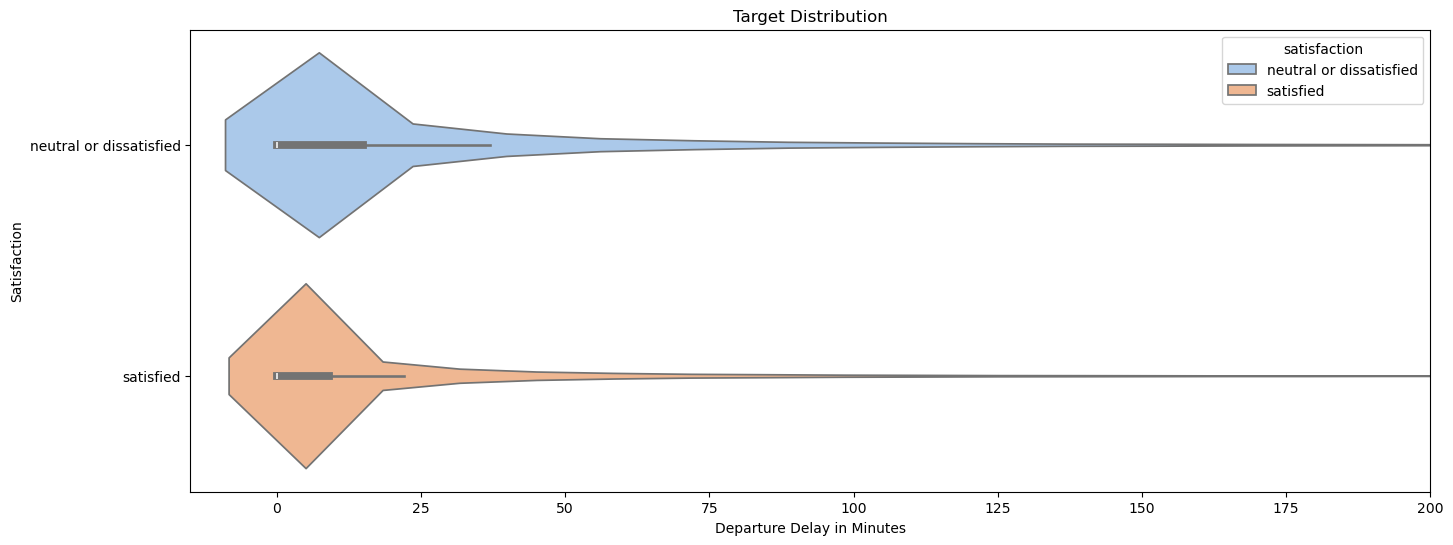

In [40]:
# 'Departure Delay in Minutes' parece tener algunos outliers. Los eliminamos y volvemos a graficar.
plt.figure(figsize=(16, 6))
ax = sns.violinplot(data=df, x='Departure Delay in Minutes', y='satisfaction', hue='satisfaction', palette='pastel', legend=True)
plt.title('Target Distribution')
plt.xlabel('Departure Delay in Minutes')
plt.ylabel('Satisfaction')
ax.set_xlim(-15, 200)
plt.show()

In [41]:
# Parece que el retraso tiene un impacto en la satisfacción, pero no mucho.

#### Por retraso en la llegada

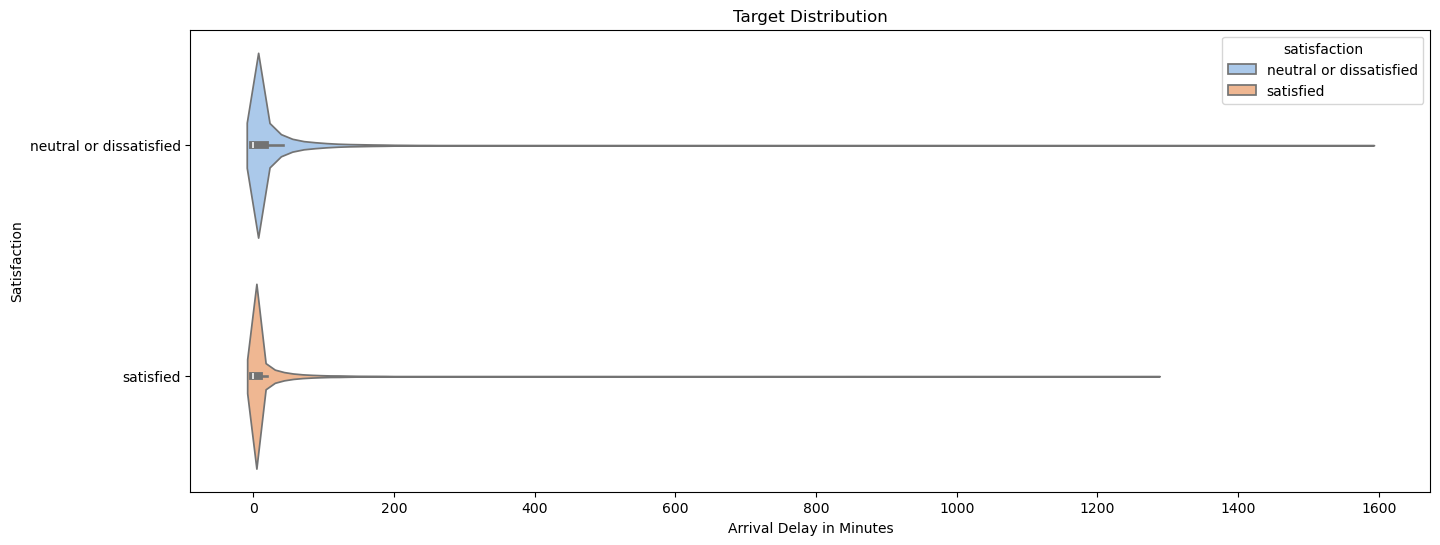

In [42]:
# Plot
plt.figure(figsize=(16, 6))
sns.violinplot(data=df, x='Arrival Delay in Minutes', y='satisfaction', hue='satisfaction', palette='pastel', legend=True)
plt.title('Target Distribution')
plt.xlabel('Arrival Delay in Minutes')
plt.ylabel('Satisfaction')
plt.show()

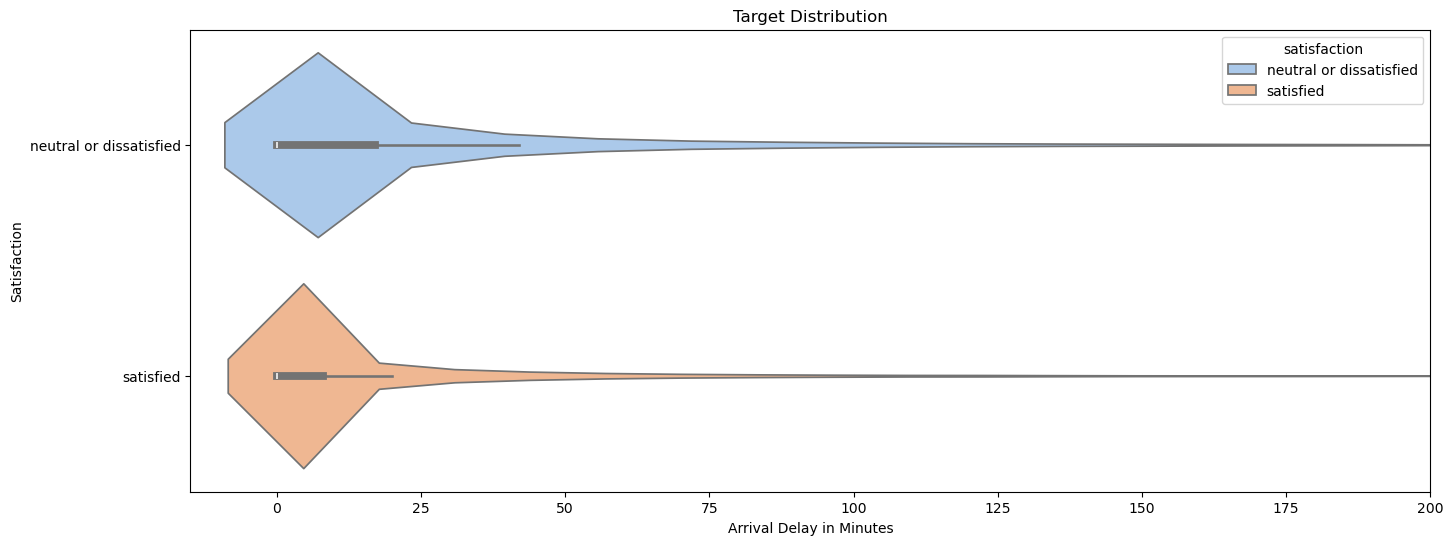

In [43]:
# 'Arrival Delay in Minutes' parece tener algunos outliers. Los eliminamos y volvemos a graficar.
plt.figure(figsize=(16, 6))
ax = sns.violinplot(data=df, x='Arrival Delay in Minutes', y='satisfaction', hue='satisfaction', palette='pastel', legend=True)
plt.title('Target Distribution')
plt.xlabel('Arrival Delay in Minutes')
plt.ylabel('Satisfaction')
ax.set_xlim(-15, 200)
plt.show()

In [44]:
# La distribución parece ser bastante similar a la del retraso en la salida. Quizás exista una fuerte correlación entre ambas.

#### Correlaciones

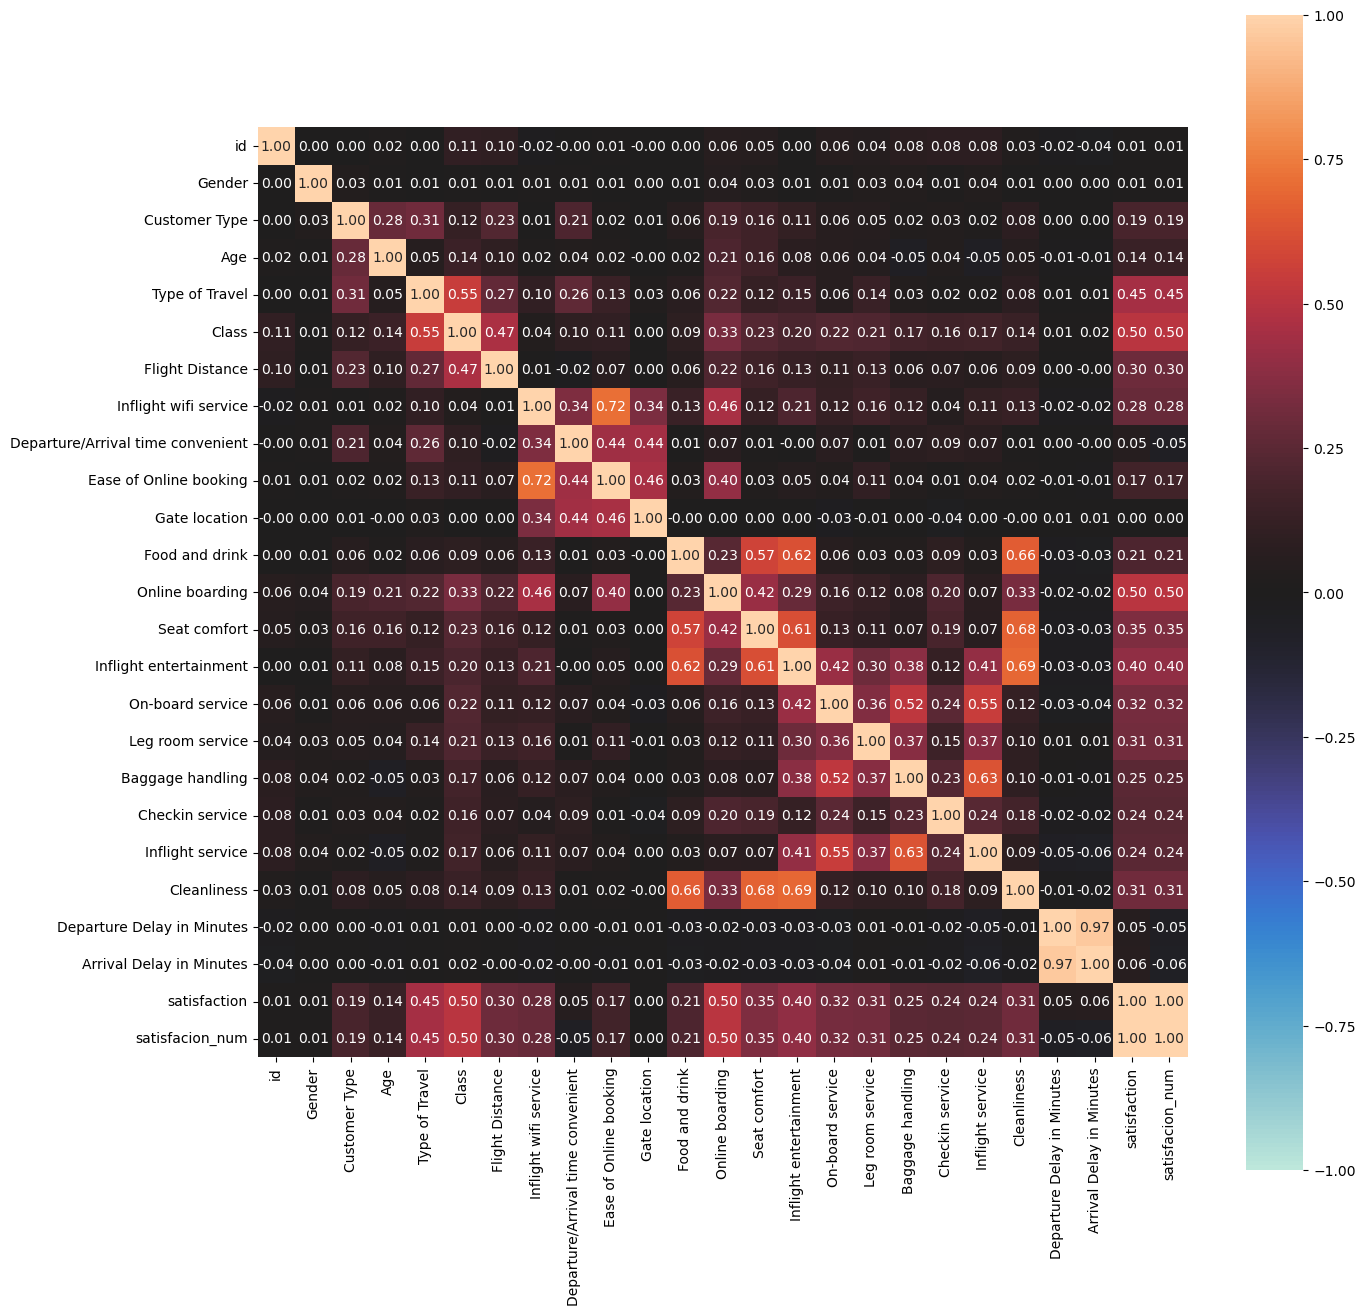

In [45]:
# https://shakedzy.xyz/dython/modules/nominal/#associations
as_dict = dt.nominal.associations(df, compute_only=False, figsize=(15,15))

In [ ]:
# Esto demuestra que los retrasos en las llegadas y en las salidas están altamente correlacionados.
# Otros datos interesantes que podemos obtener de esto son:
#     - Hay muchos bloques de correlación. Por ejemplo, el que se forma por tipo de viaje, clase y distancia de vuelo (Type of Travel, Class, Flight Distance)
#     - Hay algunas características que no muestran correlación con nuestro target:
#            - id (tiene sentido)
#            - Gender (tiene sentido)
#            - Gate Location (tiene sentido)
#     - Curiosamente, los retrasos en la llegada y en la salida muestran muy poca correlación con la satisfacción.

### Chequeo dataset de Test

In [46]:
df = pd.read_csv('datasets/aerolineas/test.csv')
df.drop(columns=[df.columns[0]], inplace=True) # Eliminar columna tipo índice
df.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,...,2,2,2,2,4,2,4,0,20.0,satisfied


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 25976 non-null  int64  
 1   Gender                             25976 non-null  object 
 2   Customer Type                      25976 non-null  object 
 3   Age                                25976 non-null  int64  
 4   Type of Travel                     25976 non-null  object 
 5   Class                              25976 non-null  object 
 6   Flight Distance                    25976 non-null  int64  
 7   Inflight wifi service              25976 non-null  int64  
 8   Departure/Arrival time convenient  25976 non-null  int64  
 9   Ease of Online booking             25976 non-null  int64  
 10  Gate location                      25976 non-null  int64  
 11  Food and drink                     25976 non-null  int

In [48]:
# Presenta el mismo problema. Hay algunos valores nulos en el retraso de llegada. Se eliminarán.